In [183]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [184]:
def train(lr = 0.1, steps = 15):
    model = torch.nn.Linear(4, 1, bias=False)

    # fix the initialization for reproducing results, do not change. In practice, we use random initialization
    model.weight.data = torch.FloatTensor([[ 2.0871, -1.3213,  0.7339, -1.0858]])
    
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_func = torch.nn.functional.mse_loss
    
    train_loss_list = []
    
    model.train()
    
    for _ in tqdm(range(steps)):
        pred = model(X_train)
        
        # reduction='sum' is for consistent computation for linear regression. In practice, we often use reduction='mean'
        loss = 0.5 * loss_func(pred, y_train, reduction='sum') 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        train_loss_list.append(loss.detach().item())

    return train_loss_list

# Dataset 0

In [185]:
# load the data
X_train = np.load('X_train_0.npy')
y_train = np.load('y_train_0.npy')

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)

In [186]:
loss_vs_lr = dict()

# TODO: please change lr_list to your list of learning rates
lr_list = [round(0.1 * i, 1) for i in range(1, 21)]
lossafter15=dict()
for lr in lr_list:
    loss_vs_lr[lr] = train(lr=lr, steps=15)
    lossafter15[lr]=loss_vs_lr[lr][14]
    print(f"At lr: {lr}")
    print(lossafter15[lr])
    

100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 222.01it/s]


At lr: 0.1
0.5020795464515686


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3246.20it/s]


At lr: 0.2
0.07500029355287552


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3317.93it/s]


At lr: 0.3
0.012587976641952991


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 4074.78it/s]


At lr: 0.4
0.0021579700987786055


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3680.94it/s]


At lr: 0.5
0.0003476063720881939


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3992.55it/s]


At lr: 0.6
5.013357804273255e-05


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 4031.18it/s]


At lr: 0.7
6.2867379710951354e-06


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3032.17it/s]


At lr: 0.8
6.681175364064984e-07


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 2850.55it/s]


At lr: 0.9
5.843933692517567e-08


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3531.75it/s]


At lr: 1.0
4.052070234905614e-09


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3870.00it/s]


At lr: 1.1
2.122710202057121e-10


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 4545.85it/s]


At lr: 1.2
7.83447265395587e-12


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 4139.39it/s]


At lr: 1.3
1.844563862546042e-13


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3633.74it/s]


At lr: 1.4
4.087434817695579e-12


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3919.67it/s]


At lr: 1.5
2.2043644687386177e-09


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3003.66it/s]


At lr: 1.6
3.6283725535213307e-07


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3666.56it/s]


At lr: 1.7
2.7180343749932945e-05


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3897.81it/s]


At lr: 1.8
0.0011429532896727324


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3013.87it/s]


At lr: 1.9
0.030924329534173012


100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 3646.16it/s]

At lr: 2.0
0.5909008383750916


QA) 

1. a) The largest and smallest real eigenvalues of XTX are 1 and 0.5. 

In [187]:

XTX = torch.matmul(X_train.T, X_train)
evals,evecs= torch.linalg.eig(XTX)
real_evals = evals.real
max_eigenvalue = torch.max(real_evals)
min_eigenvalue = torch.min(real_evals)



2. b)
Plot the training loss after 15 steps versus different learning rates η. Please use
20 learning rates as {0.1, 0.2, 0.3, . . . , 1.9, 2.0}. (The loss axis is plot in log scaling.
Only plot the loss value at 15 steps instead of all values during 0-15 steps.) 

/var/folders/4q/tsr3nb5s33gc0n3xh6lwsp040000gn/T/ipykernel_6100/1426186783.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


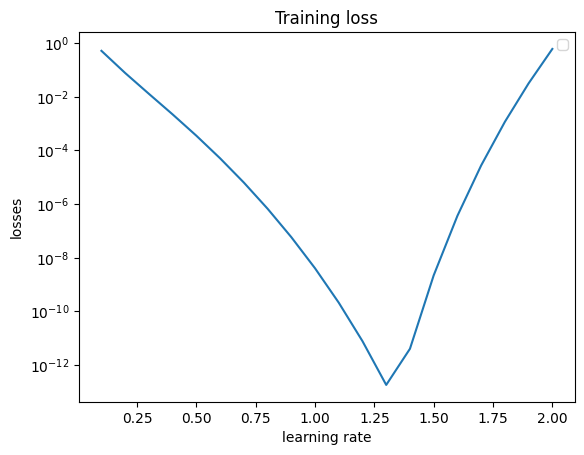

In [188]:
losses= []

for lr in lr_list:
    losses.append(lossafter15[lr])
    ##we are plotting the loss after the 15 steps for each learning rate. 
    ##we see the loss decreses until lr = 1.3 and then it increases  
    
plt.plot(lr_list, losses)
plt.ylabel('losses')
plt.xlabel('learning rate')
plt.yscale('log')
plt.title("Training loss")
plt.legend()

We are plotting the loss after the 15 steps for each learning rate.
We see the loss decreses until lr = 1.3 and then it increases. Suggesting the best learnign rate to minimize the loss is 1.3 

    c) We see at the learning rate of 2 the loss function is no longer being minimized and the loss is greater than in smaller learnign rates like 1.3
    This is consisten with our limit bound for the learning rate since we know the learning rate for it to be convergent has to remain in the range of 0 an 2/L L beig the maxium eigenvalue and in this scenario we see 2/1= 2. Therfore the uppor bound of the learning rate is 2. 
    
    d) The best learning rate with the smallest loss at 15 steps is learning rate 1.3
    




# Dataset 1

In [194]:
# load the data
X_train = np.load('X_train_1.npy')
y_train = np.load('y_train_1.npy')

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)

QA)

    a) The largest and smallest real eigenvalues of XTX are 1 and 0.01



In [195]:

XTX = torch.matmul(X_train.T, X_train)
evals,evecs= torch.linalg.eig(XTX)
real_evals = evals.real
max_eigenvalue = torch.max(real_evals)
print("max")
print(max_eigenvalue)
min_eigenvalue = torch.min(real_evals)
print("min" )
print(min_eigenvalue)

max
tensor(1.0000)
min
tensor(0.0100)


In [196]:
loss_vs_lr = dict()

lr_list = [round(0.1 * i, 1) for i in range(1, 21)]


lossafter600=dict()

for lr in lr_list:
    loss_vs_lr[lr] = train(lr=lr, steps=600)
    lossafter600[lr]= loss_vs_lr[lr][599]
    print(f"At lr: {lr}")
    print(lossafter600[lr])

100%|███████████████████████████████████████| 600/600 [00:00<00:00, 4244.96it/s]


At lr: 0.1
0.006560997571796179


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 5792.86it/s]


At lr: 0.2
0.001976531697437167


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6052.71it/s]


At lr: 0.3
0.0005947237368673086


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6078.17it/s]


At lr: 0.4
0.00017873285105451941


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6133.89it/s]


At lr: 0.5
5.364951357478276e-05


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6166.31it/s]


At lr: 0.6
1.608445745659992e-05


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 5815.82it/s]


At lr: 0.7
4.81629012938356e-06


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 5944.55it/s]


At lr: 0.8
1.4404492958419723e-06


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6002.11it/s]


At lr: 0.9
4.303003038330644e-07


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6000.54it/s]


At lr: 1.0
1.2837323026815284e-07


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6046.44it/s]


At lr: 1.1
3.8254079015587195e-08


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6192.73it/s]


At lr: 1.2
1.1384527986990634e-08


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6160.82it/s]


At lr: 1.3
3.383791025157734e-09


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6170.36it/s]


At lr: 1.4
1.0045261289448604e-09


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6179.95it/s]


At lr: 1.5
2.981735414131492e-10


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6174.62it/s]


At lr: 1.6
8.813942631302751e-11


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6170.94it/s]


At lr: 1.7
2.5996831423680256e-11


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6214.09it/s]


At lr: 1.8
7.713637020789754e-12


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6195.15it/s]


At lr: 1.9
2.2833386657122867e-12


100%|███████████████████████████████████████| 600/600 [00:00<00:00, 6139.67it/s]

At lr: 2.0
0.5907838344573975


/var/folders/4q/tsr3nb5s33gc0n3xh6lwsp040000gn/T/ipykernel_6100/2398681827.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


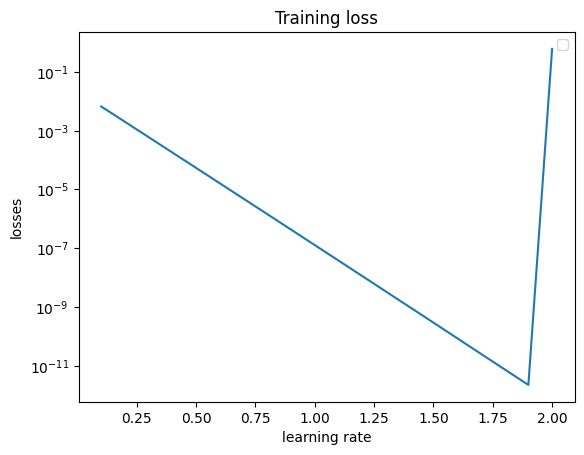

In [197]:
losses= []

for lr in lr_list:
    losses.append(lossafter600[lr])
    ##we are plotting the loss after the 15 steps for each learning rate. 
    ##we see the loss decreses until lr = 1.3 and then it increases  
    
plt.plot(lr_list, losses)
plt.ylabel('losses')
plt.xlabel('learning rate')
plt.yscale('log')
plt.title("Training loss")
plt.legend()

The minimizing learning rate is at 1.9 in datase B

We can see from Ab the optimal learning rate was 1.3 and for Bb the optimal learning rate was 1.9 , as the steps increase the minimizing learning rate approaches to the optimal learning rate we found earlier in question 1c. The optimal learning rate is 2/(min_eigenvalue+max_eigenvalue) which is consistent with the following datasets. 

Dataset 0: 
    max eval= 1
    min eval=0.5
    
    optimal learning rate= 2/1.5=1.3 among our learning rate list 1.3 is the optimal

Dataset 1: 

    max eval= 1
    min eval= 0.01

    optimal learning rate= 2/1.01 =1.98 which among our learning rates shows 1.9 is the optimal learning rate since 2 is our upper bound for the learning rate and we know that at 2/L the learning rate is divergent.  

    This is consistent with the upper bound of 2/L which in this dataset is 2/1 since the maximum eigenvalue of XTX is 1.
